In [203]:
pip install cryptography

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 13.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
R.<x> = QQ[]
f = x^7+38*x^6+486*x^5+7*x^4+17*x^3+25*x^2+37*39
K.<theta> = NumberField(f)
OK = K.ring_of_integers()
OK.gens()

(1, theta, theta^2, theta^3, theta^4, theta^5, theta^6)

In [2]:
factor(f.discriminant())

-1 * 3 * 13 * 37 * 55673 * 546688457773 * 2012929963755409

In [4]:
f.discriminant()/39

-2266808945518269427181472875848457

In [20]:
f = x^12-134*x^11 +31*x^2+7**2*x+7**2
K.<theta> = NumberField(f)
OK = K.ring_of_integers()
OK.gens()

(1,
 5/7*theta^11 + 2/7*theta^10 + 1/7*theta,
 theta^2,
 theta^3,
 theta^4,
 theta^5,
 theta^6,
 theta^7,
 theta^8,
 theta^9,
 theta^10,
 theta^11)

In [21]:
g = f.derivative()
roots = g.roots(CC)

In [22]:
roots

[(-0.612569206989289, 1),
 (0.761636175594106, 1),
 (122.833333333333, 1),
 (-0.573570492510952 - 0.334845715943153*I, 1),
 (-0.573570492510952 + 0.334845715943153*I, 1),
 (-0.282275065658703 - 0.656756499024247*I, 1),
 (-0.282275065658703 + 0.656756499024247*I, 1),
 (0.183689009597487 - 0.719543954986266*I, 1),
 (0.183689009597487 + 0.719543954986266*I, 1),
 (0.597623064269759 - 0.464788548455282*I, 1),
 (0.597623064269759 + 0.464788548455282*I, 1)]

In [24]:
res = 1
for i in range(len(roots)):
    res = res * f(roots[i][0])
    print(res)

31.2300495658244
3049.21300067069
-3.27031756749650e27
-9.46749357547093e28 + 1.69184448369943e28*I
-2.82834221599510e30
-7.77979453682568e31 + 5.61510491112072e31*I
-3.25471952006087e33
-1.46166183061562e35 + 1.26144844552303e35*I
-1.14532372599694e37
-9.07108809115024e38 + 3.98474553157267e38*I
-8.57075024996542e40 + 4.83570327845852e24*I


In [37]:
list_of_values = []
for i in range(100000):
    a = randint(0,2**128)
    b = randint(0,2**128)
    d = gcd(a,b)
    list_of_values = list_of_values + [d]

In [ ]:
float(mean(list_of_values))

# discriminant primality test

In [1]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.backends.openssl.backend import backend
from cryptography.hazmat.bindings.openssl.binding import Binding
import itertools
import time
from datetime import datetime
import csv
from sage.all import pari

In [2]:
R.<x> = QQ[]

def is_prime_PARI(n):
    """Check primality using PARI/GP (Sage). Handles arbitrarily large integers."""
    return pari(n).isprime()
    return bool(res)

In [3]:
def random_prime_PARI(kappa):
    lower = 2^(kappa-1)
    upper = 2^kappa
    while True:
        candidate = randint(lower, upper)
        # ensure odd
        if candidate % 2 == 0:
            candidate += 1
        # test primality using PARI
        if is_prime_PARI(candidate):
            return candidate

In [4]:
def rand_poly(n,L):
    return R([randint(-L,L+1) for i in range(n-1)]+[1])

In [5]:
def prime_disc(poly):
    disc = poly.discriminant()
    return  is_prime_PARi(int(abs(disc)))

In [6]:
def prime_disc_exp(n,L,sample_size):
    val = 0
    sample = 0
    while sample < sample_size:
        poly = rand_poly(n,L)
        if poly.is_irreducible():
            sample = sample+1
            val = val + prime_disc(poly)
    return float(val/sample_size)

In [54]:
list_of_n = [8, 16, 32]
L = [2] + [2*n for n in list_of_n]
sample_size = [2*(n**2) for n in list_of_n]

In [55]:
results = [0,0,0]
for i in range(3):
    results[i] = prime_disc_exp(list_of_n[i],2,sample_size[i])

In [56]:
results

[0.078125, 0.0234375, 0.00634765625]

In [60]:
expected = [float(1/(2*n)) for n in list_of_n]

In [61]:
expected

[0.0625, 0.03125, 0.015625]

In [62]:
results = [0,0,0]
for i in range(3):
    results[i] = prime_disc_exp(list_of_n[i],L[i+1],sample_size[i])

In [63]:
results

[0.03125, 0.005859375, 0.00439453125]

In [ ]:
list_of_n = [8, 16, 32]

In [7]:
def monogenicity_oracle(n,L,kappa):
    b = randint(0,2)
    p = int(random_prime_PARI(kappa))
    q = int(random_prime_PARI(kappa))
    if b:
        r = int(random_prime_PARI(kappa))
        N = p*q*r
    else:
        N = p*p*q
    count = 0 
    while True:
        count+=1
        f = rand_poly(n-2,L)*x^2+N*x+N
        if f.is_irreducible():
            disc_f_divided_by_N = abs(int(f.discriminant()/N))
            if is_prime_PARI(disc_f_divided_by_N):
                return (f, count)

In [14]:
# Define ordered parameter sets (smallest first)
ns = [48+i for i in range(16)]
Ls = [1]  # 1..256
kappas = [8]
samples_per_setting = 100

output_file = "monogenicity_results.csv"

# Prepare CSV (header rewritten once only)
with open(output_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["n", "L", "kappa", "avg_count", "samples", "time_sec", "timestamp"])

def run_oracle(n, L, kappa):
    try:
        f, count = monogenicity_oracle(n, L, kappa)
        return int(count)
    except Exception:
        return None


print("\n✅ Starting ordered monogenicity experiment...\n")

start_overall = time.time()
total_tasks = len(ns) * len(Ls) * len(kappas)
done = 0

for n in ns:
    for L in Ls:
        for kappa in kappas:

            done += 1
            print(f"\n[{done}/{total_tasks}] → Running n={n}, L={L}, kappa={kappa}")

            t0 = time.time()
            counts = []

            for i in range(samples_per_setting):
                c = run_oracle(n, L, kappa)
                if c:
                    counts.append(c)

            elapsed = time.time() - t0

            if counts:
                avg_count = float(sum(counts)) / len(counts)
                print(f"   Avg = {avg_count:.2f}  over {len(counts)} samples")
            else:
                avg_count = None
                print("   No valid samples")

            # Write partial results immediately
            with open(output_file, "a", newline="") as f:
                writer = csv.writer(f)
                writer.writerow([
                    int(n), int(L), int(kappa),
                    avg_count if avg_count is not None else "",
                    int(len(counts)),
                    round(float(elapsed), 2),
                    datetime.now().isoformat()
                ])

total_time = (time.time() - start_overall) / 3600
print(f"\n✅ All tasks complete! Total time: {total_time:.2f} hours")
print(f"📁 Results saved to: {output_file}\n")



✅ Starting ordered monogenicity experiment...


[1/16] → Running n=48, L=1, kappa=8
   Avg = 633.27  over 100 samples

[2/16] → Running n=49, L=1, kappa=8
   Avg = 612.28  over 100 samples

[3/16] → Running n=50, L=1, kappa=8
   Avg = 791.77  over 100 samples

[4/16] → Running n=51, L=1, kappa=8
   Avg = 910.63  over 100 samples

[5/16] → Running n=52, L=1, kappa=8
   Avg = 958.85  over 100 samples

[6/16] → Running n=53, L=1, kappa=8
   Avg = 979.56  over 100 samples

[7/16] → Running n=54, L=1, kappa=8
   Avg = 880.11  over 100 samples

[8/16] → Running n=55, L=1, kappa=8
   Avg = 734.05  over 100 samples

[9/16] → Running n=56, L=1, kappa=8
   Avg = 837.10  over 100 samples

[10/16] → Running n=57, L=1, kappa=8


KeyboardInterrupt: 

slope     = 16.505322299651567
intercept = -56.35501742160252


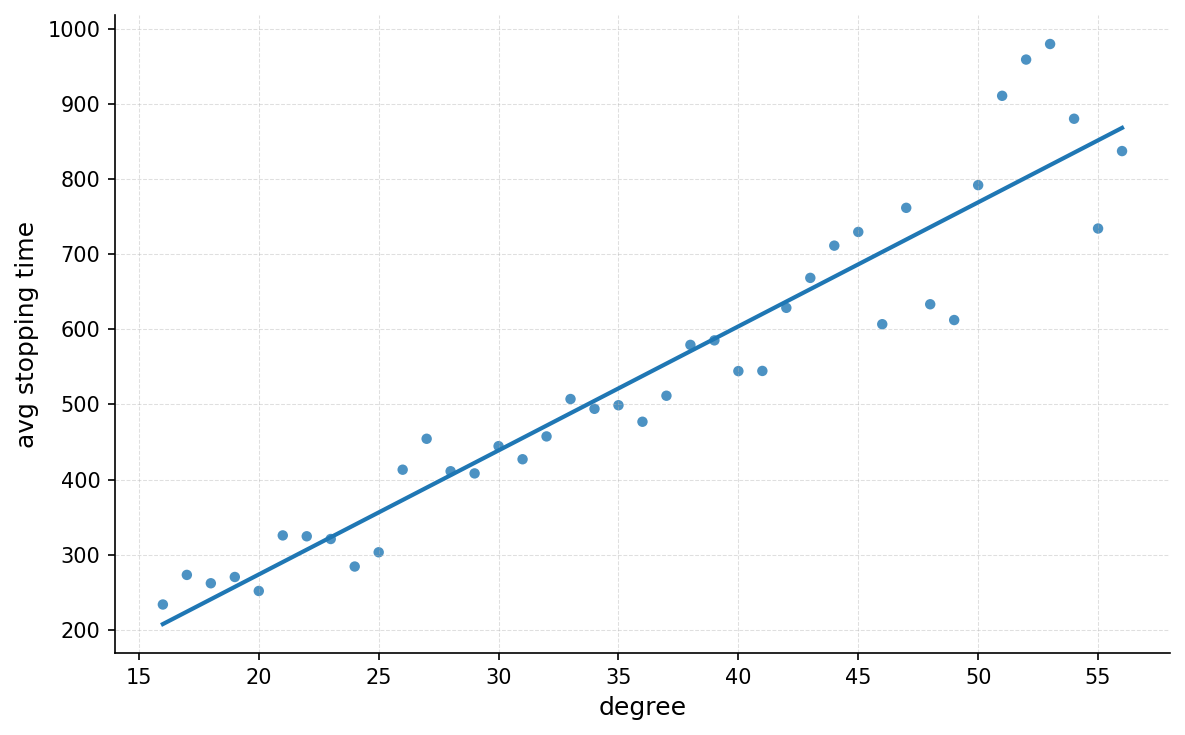

In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# ---------- Load data ----------
# Adjust the filename to exactly match your file
filename = "monogenicity_results-56.csv"

# ---------- Load data ----------
degrees = []
avg_stopping = []

with open(filename, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        degrees.append(int(row["n"]))
        avg_stopping.append(float(row["avg_count"]))

x = np.array(degrees, dtype=float)
y = np.array(avg_stopping, dtype=float)

# ---------- Linear regression (least squares) ----------
# y ≈ a x + b
a, b = np.polyfit(x, y, 1)
print("slope     =", a)
print("intercept =", b)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = a * x_fit + b

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)

# Scatter: small, semi-transparent points
ax.scatter(
    x, y,
    s=25,              # marker size
    alpha=0.8,
    edgecolors="none"
)

# Linear fit line
ax.plot(
    x_fit, y_fit,
    linewidth=2
)

# Axis labels
ax.set_xlabel("degree", fontsize=12)
ax.set_ylabel("avg stopping time", fontsize=12)

# Light grid & cleaner frame
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.4)
ax.tick_params(axis="both", labelsize=10)

# Remove top and right spines
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

# Make sure nothing is cut off
fig.tight_layout()

# Show on screen
plt.show()

# Save as PNG with safe margins
fig.savefig(
    "avg_stopping_time_vs_degree.png",
    dpi=300,
    bbox_inches="tight"
)
    

In [ ]:
# Define ordered parameter sets (smallest first)
ns = [32]
Ls = [2**i for i in range(128)]  # 1..256
kappas = [8]
samples_per_setting = 100

output_file = "monogenicity_results.csv"

# Prepare CSV (header rewritten once only)
with open(output_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["n", "L", "kappa", "avg_count", "samples", "time_sec", "timestamp"])

def run_oracle(n, L, kappa):
    try:
        f, count = monogenicity_oracle(n, L, kappa)
        return int(count)
    except Exception:
        return None


print("\n✅ Starting ordered monogenicity experiment...\n")

start_overall = time.time()
total_tasks = len(ns) * len(Ls) * len(kappas)
done = 0

for n in ns:
    for L in Ls:
        for kappa in kappas:

            done += 1
            print(f"\n[{done}/{total_tasks}] → Running n={n}, L={L}, kappa={kappa}")

            t0 = time.time()
            counts = []

            for i in range(samples_per_setting):
                c = run_oracle(n, L, kappa)
                if c:
                    counts.append(c)

            elapsed = time.time() - t0

            if counts:
                avg_count = float(sum(counts)) / len(counts)
                print(f"   Avg = {avg_count:.2f}  over {len(counts)} samples")
            else:
                avg_count = None
                print("   No valid samples")

            # Write partial results immediately
            with open(output_file, "a", newline="") as f:
                writer = csv.writer(f)
                writer.writerow([
                    int(n), int(L), int(kappa),
                    avg_count if avg_count is not None else "",
                    int(len(counts)),
                    round(float(elapsed), 2),
                    datetime.now().isoformat()
                ])

total_time = (time.time() - start_overall) / 3600
print(f"\n✅ All tasks complete! Total time: {total_time:.2f} hours")
print(f"📁 Results saved to: {output_file}\n")



✅ Starting ordered monogenicity experiment...


[1/128] → Running n=32, L=1, kappa=8


slope     = 15.503491935483869
intercept = 325.61633064516144


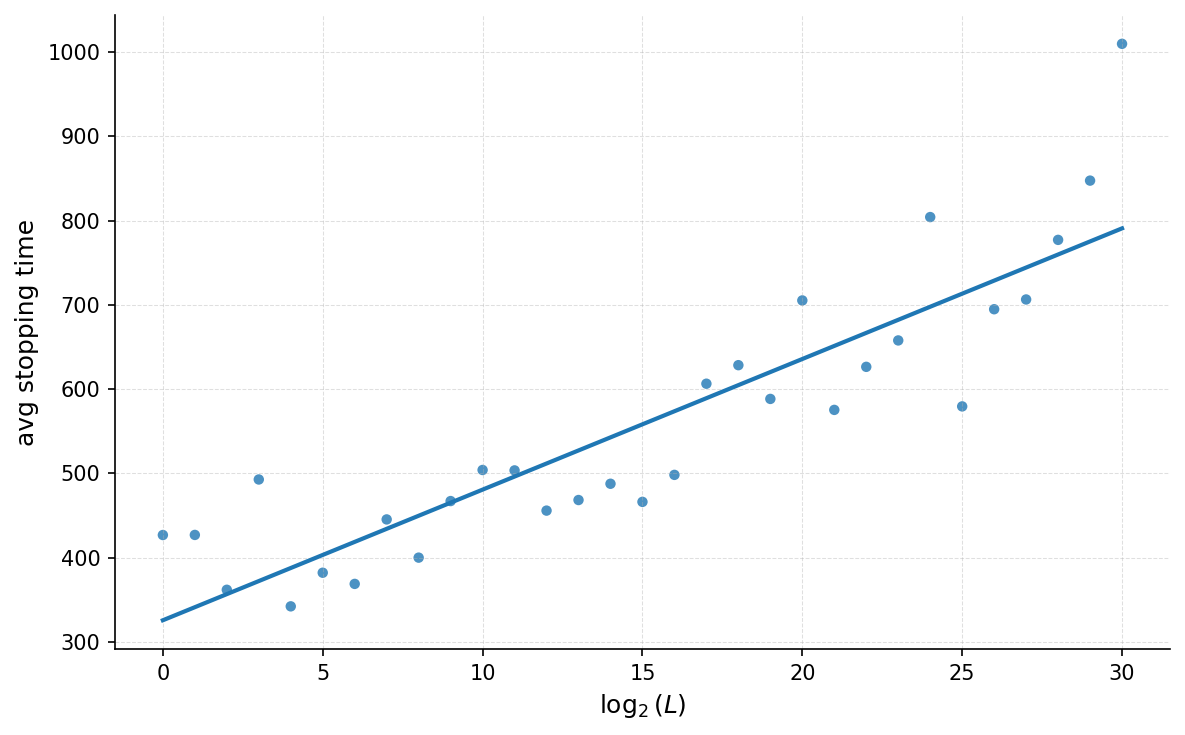

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# ---------- Load data ----------
filename = "monogenicity_results-box-model.csv"

L_values = []
avg_stopping = []

with open(filename, "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        L_values.append(int(row["L"]))        # assuming the column is named "L"
        avg_stopping.append(float(row["avg_count"]))

# Convert to numpy arrays
L = np.array(L_values, dtype=float)
y = np.array(avg_stopping, dtype=float)

# x-axis is log2(L)
x = np.log2(L)

# ---------- Linear regression: y ≈ a x + b ----------
a, b = np.polyfit(x, y, 1)
print("slope     =", a)
print("intercept =", b)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = a * x_fit + b

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)

# Scatter plot
ax.scatter(
    x, y,
    s=25,
    alpha=0.8,
    edgecolors="none"
)

# Regression line
ax.plot(
    x_fit, y_fit,
    linewidth=2
)

# Labels
ax.set_xlabel(r"$\log_2(L)$", fontsize=12)
ax.set_ylabel("avg stopping time", fontsize=12)

# Grid & styling
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.4)
ax.tick_params(axis="both", labelsize=10)

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

fig.tight_layout()

# Show plot
plt.show()

# Save plot
fig.savefig(
    "avg_stopping_time_vs_logL.png",
    dpi=300,
    bbox_inches="tight"
)

In [24]:
R.<x> = QQ[]

In [40]:
f = (x-3)^2*(x^4+2*x^3+x+1)+121*(x^5+x^2+x)
K.<theta> = NumberField(f)
OK = K.ring_of_integers()
OK.gens()

(7/11*theta^5 + 4/11*theta^4 + 2/11*theta^3 + 7/11*theta^2 + 8/11*theta + 1/11,
 theta,
 theta^2,
 theta^3,
 theta^4,
 theta^5)

In [41]:
disc = f.discriminant()
factor(disc)

11^2 * 307 * 109253 * 25158295670791

In [27]:
f

x^6 + 45*x^5 - 3*x^4 + 19*x^3 + 44*x^2 + 150*x + 9

In [42]:
f_bar=f.change_ring(GF(109253))
f_bar.factor()

(x + 30354)^2 * (x^2 + 3035*x + 65685) * (x^2 + 45627*x + 92081)

In [29]:
f_bar_lift = (x+5)*(x+4)^2*(x^3 + 4*x^2 + x + 3)

In [30]:
h = f-f_bar_lift

In [34]:
h_bar = (h/7).change_ring(GF(7))
h_bar.factor()

(4) * (x + 1) * (x + 3) * (x + 4) * (x^2 + 2*x + 5)

In [43]:
g=f-(x + 30354)^2 * (x^2 + 3035*x + 65685) * (x^2 + 45627*x + 92081)

In [45]:
g/109253

-x^5 - 36742*x^4 - 487447047*x^3 - 1170979744145*x^2 - 27634919960512*x - 51007580041167